First few rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Data after dropping 'Id' and 'Species' columns:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

Outliers detected in each feature:
SepalLengthCm    0
SepalWidthCm     4
PetalLengthCm    0
Petal

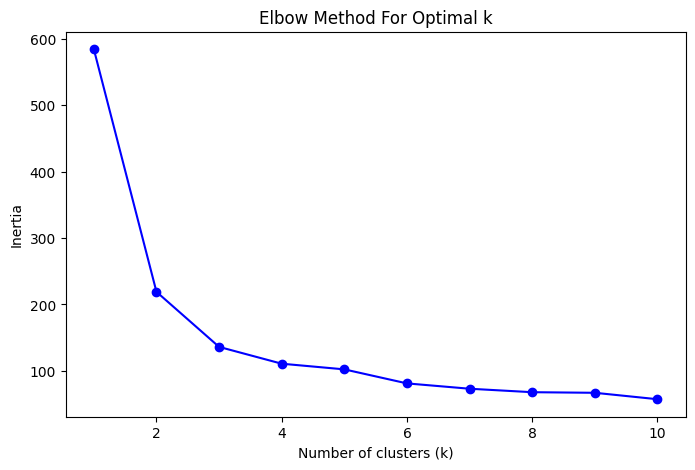


Inertia for different values of k (1 to 10):
[(1, 584.0), (2, 218.9344999874387), (3, 136.06890901675075), (4, 110.78072118237262), (5, 102.2639569409887), (6, 81.14993889313067), (7, 73.1279976269517), (8, 67.90706789565638), (9, 67.01012106676441), (10, 57.338781751009456)]

Cluster assignments for first 5 rows:
   SepalLengthCm  PetalLengthCm  Cluster_3
0            5.1            1.4          2
1            4.9            1.4          2
2            4.7            1.3          2
3            4.6            1.5          2
4            5.0            1.4          2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16040\2252660751.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_data_no_outliers['Cluster_3'] = kmeans_3.fit_predict(iris_scaled)


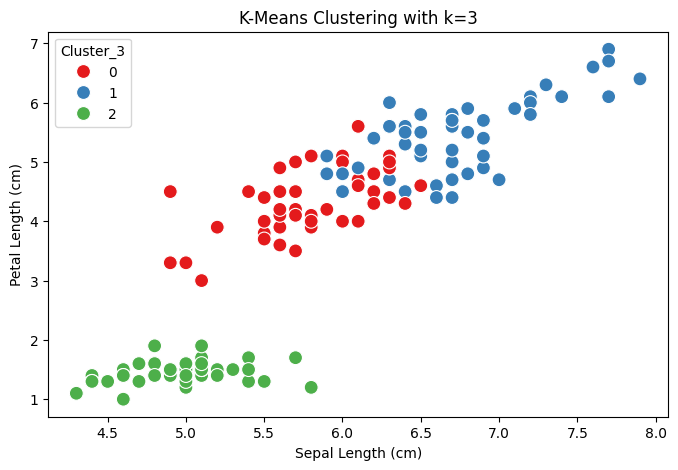

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris_data = pd.read_csv('Iris.csv')
print("First few rows of the dataset:")
print(iris_data.head())

# Drop 'Id' and 'Species' columns for clustering
iris_data_cleaned = iris_data.drop(columns=['Id', 'Species'])
print("\nData after dropping 'Id' and 'Species' columns:")
print(iris_data_cleaned.head())

# Outlier detection using Interquartile Range (IQR)
Q1 = iris_data_cleaned.quantile(0.25)
Q3 = iris_data_cleaned.quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers
outliers = ((iris_data_cleaned < lower_bound) | (iris_data_cleaned > upper_bound)).sum()
print("\nOutliers detected in each feature:")
print(outliers)

# Remove outliers from the dataset
iris_data_no_outliers = iris_data_cleaned[~((iris_data_cleaned < lower_bound) | (iris_data_cleaned > upper_bound)).any(axis=1)]
print("\nShape of data after outlier removal:", iris_data_no_outliers.shape)

# Standardize the features
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_data_no_outliers)
print("\nFirst few rows of scaled data:")
print(pd.DataFrame(iris_scaled, columns=iris_data_no_outliers.columns).head())

# Elbow Method to find the optimal number of clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

print("\nInertia for different values of k (1 to 10):")
print(list(zip(K, inertia)))

# Apply K-Means with k=3 (as determined from the elbow method)
kmeans_3 = KMeans(n_clusters=3, random_state=42)
iris_data_no_outliers['Cluster_3'] = kmeans_3.fit_predict(iris_scaled)
print("\nCluster assignments for first 5 rows:")
print(iris_data_no_outliers[['SepalLengthCm', 'PetalLengthCm', 'Cluster_3']].head())

# Visualizing the clusters using Sepal Length and Petal Length
plt.figure(figsize=(8, 5))
sns.scatterplot(x=iris_data_no_outliers['SepalLengthCm'],
                y=iris_data_no_outliers['PetalLengthCm'],
                hue=iris_data_no_outliers['Cluster_3'],
                palette='Set1',
                s=100)

plt.title('K-Means Clustering with k=3')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()


The **inertia** in K-Means clustering measures how tightly the data points are grouped around their respective centroids. Specifically, it is the sum of the squared Euclidean distances between each data point and its corresponding centroid.

### Why Does Inertia Keep Decreasing as the Number of Clusters Increases?

The reason inertia decreases as the number of clusters (`k`) increases is due to the nature of K-Means and the way it assigns data points to clusters:

1. **Fewer Clusters**: 
   - When `k` is small (e.g., `k = 1`), all the data points are assigned to a single cluster. This cluster is the centroid of all data points, and since the data points are spread out, the inertia is large.
   - Inertia is high because the data points are far from the centroid, leading to large squared distances.

2. **More Clusters**: 
   - As you increase `k`, each cluster has fewer data points, and the centroid is recalculated based on those points.
   - The more clusters you have, the more precisely each data point can be assigned to its closest centroid. Since there are more centroids, each data point is likely to be closer to its assigned centroid.
   - This results in smaller distances between data points and their centroids, which reduces inertia.

3. **Diminishing Returns**:
   - The decrease in inertia is significant when you go from 1 to a few clusters because as you add more clusters, you are dividing the data into more specific groups, leading to tighter, more compact clusters.
   - However, after a certain point, the decrease in inertia becomes less dramatic. Each new cluster reduces the inertia a bit, but the improvement is smaller compared to the initial jumps. This is where the **elbow** appears on the inertia curve.

4. **Overfitting with Too Many Clusters**:
   - If `k` is too large, inertia will continue to decrease because the algorithm will keep creating clusters with just one or very few points, making the data points almost identical to their centroids (thus, very low inertia).
   - But this does not necessarily result in meaningful clusters—it could mean overfitting, where the model is just capturing noise in the data rather than true patterns.

### Key Takeaways:
- As the number of clusters increases, inertia decreases because data points are assigned to more centroids, reducing the distance between the points and their centroids.
- However, after a certain point, the decrease in inertia slows down, and adding more clusters does not significantly improve the clustering.
- The "elbow" point on the inertia curve represents the optimal number of clusters because it is where the inertia reduction slows significantly, indicating that further increasing `k` will not result in much better clustering.

### **K-Means Clustering**

**K-Means** is a popular unsupervised machine learning algorithm used for clustering. Clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other than to those in other groups. K-Means divides data points into `k` clusters based on their similarity.

#### How K-Means Works:
1. **Initialization**: Select `k` initial centroids (the center of each cluster). These can be chosen randomly from the dataset.
   
2. **Assignment**: Assign each data point to the nearest centroid. The distance is usually calculated using Euclidean distance.

3. **Update**: After all data points are assigned to clusters, the centroids are recalculated by finding the mean of all points in each cluster.

4. **Repeat**: Steps 2 and 3 are repeated until convergence, which happens when:
   - The assignments of points to clusters do not change anymore.
   - The centroids do not change between iterations.

#### Why Use K-Means:
- It’s efficient, easy to implement, and works well when the clusters are spherical (i.e., the data is naturally grouped into clusters with a roughly circular shape).
- It’s widely used in various domains like customer segmentation, image compression, and anomaly detection.

### **Number of Clusters Using the Elbow Method**

In K-Means clustering, one of the key challenges is deciding how many clusters (`k`) should be used. The **Elbow Method** is a technique to help determine the optimal number of clusters by plotting the **inertia** (also called the sum of squared distances) against different values of `k`.

#### Steps in the Elbow Method:
1. **Fit K-Means** for different values of `k` (e.g., 1 to 10 clusters).
2. For each `k`, calculate the **inertia**, which measures how tight or dense the clusters are. Inertia is the sum of squared distances from each data point to its assigned cluster's centroid.
3. **Plot Inertia vs. Number of Clusters**: Create a graph with the number of clusters (`k`) on the x-axis and inertia on the y-axis.

#### What the Elbow Method Shows:
- When you plot inertia against the number of clusters, you will generally see a sharp decrease in inertia as `k` increases, because more clusters mean that the data points are closer to their centroids.
- After a certain point, however, the reduction in inertia becomes much slower. This is where the "elbow" appears on the graph, which represents the optimal number of clusters. Adding more clusters beyond this point does not significantly improve the clustering.

#### Why the Elbow Method Works:
- The elbow represents a trade-off: if you use too few clusters, the inertia will be high because the clusters will be large and less defined. If you use too many clusters, the inertia will be low, but the clusters might be too small, overfitting the data. The elbow point gives the balance between a good fit and avoiding overfitting.

### **Why Elbow Method is Important:**
- **Interpretability**: It helps you choose a meaningful and reasonable number of clusters without overfitting the data.
- **Efficiency**: The elbow method is computationally inexpensive and easy to use for determining `k`.
  
### Example:

Imagine you have a dataset with customer data, and you want to cluster customers into different groups based on their purchasing behavior. Using K-Means, you apply the elbow method to decide how many clusters represent different customer segments best. You plot the inertia for different values of `k` and find that after `k=3`, the decrease in inertia slows down significantly. This indicates that 3 clusters is the optimal choice.

---

### Summary:
- **K-Means Clustering**: A method to group data points into clusters by minimizing the distance to their cluster centroids.
- **Elbow Method**: A technique to determine the optimal number of clusters (`k`) by plotting inertia against different values of `k` and looking for the point where the reduction in inertia slows down.

Here's the explanation of each step:

### 1. **Importing Libraries**
The necessary libraries are imported:
- **pandas** for data manipulation (e.g., loading the dataset).
- **numpy** for numerical operations (e.g., calculating interquartile range for outlier detection).
- **matplotlib** and **seaborn** for data visualization.
- **KMeans** for clustering the data.
- **StandardScaler** to standardize the data (scale it to have zero mean and unit variance).

### 2. **Loading the Dataset**
The Iris dataset is loaded using **pandas**. It contains different features (e.g., sepal length, sepal width, petal length, petal width) for various iris species. The dataset is read from a CSV file.

### 3. **Dropping Irrelevant Columns**
Since the dataset contains an 'Id' column (a unique identifier for each flower) and a 'Species' column (the target label), these are dropped as they are not necessary for the clustering task, which is unsupervised.

### 4. **Outlier Detection Using IQR**
Outliers are detected by calculating the **Interquartile Range (IQR)**. The IQR is the range between the 25th percentile (Q1) and 75th percentile (Q3). Outliers are defined as values that fall outside of the range determined by:
- Lower bound = Q1 - 1.5 * IQR
- Upper bound = Q3 + 1.5 * IQR

### 5. **Checking and Printing Outliers**
We check if any data points fall outside the calculated bounds and print the number of outliers for each feature (e.g., sepal length, petal length). This helps us understand how much data needs to be cleaned.

### 6. **Removing Outliers**
Rows containing outliers are removed from the dataset. This is done by filtering out any rows where one or more features fall outside the defined bounds. After removal, the shape of the dataset is printed to confirm how many rows remain.

### 7. **Standardizing the Features**
Standardization is applied to the data using **StandardScaler**. This step ensures that all features have a mean of 0 and a standard deviation of 1. Standardization is important because K-Means is sensitive to the scale of the data, and we want each feature to contribute equally to the clustering.

### 8. **Elbow Method to Determine Optimal Number of Clusters**
The **Elbow Method** is used to determine the optimal number of clusters. For different values of `k` (from 1 to 10), we fit the K-Means algorithm and calculate **inertia** (a measure of how well the data is clustered). Inertia decreases as the number of clusters increases, but at some point, it starts to level off. The "elbow" point is where the inertia reduction slows down, indicating the optimal number of clusters.

### 9. **Plotting the Elbow Curve**
An elbow curve is plotted using the inertia values for each value of `k`. The point where the curve bends (forming an "elbow") is considered the optimal number of clusters.

### 10. **Printing Inertia Values**
The inertia values for different `k` values are printed. This helps confirm the elbow point visually and mathematically.

### 11. **Applying K-Means with k=3**
Once the optimal number of clusters is determined (in this case, k=3), we apply the **K-Means algorithm** with `k=3`. The cluster assignments for each data point are stored in a new column.

### 12. **Visualizing the Clusters**
A scatter plot is created to visualize the clustering results. The plot shows how the data points are grouped into clusters, with different colors representing different clusters. The axes are selected based on features that best highlight the clustering (e.g., sepal length vs. petal length).

---

### Summary:
- **Data Preprocessing**: Cleaning the data by removing unnecessary columns and outliers, followed by standardizing the features to ensure fair clustering.
- **Clustering**: Using the K-Means algorithm to divide the dataset into groups.
- **Elbow Method**: Determining the optimal number of clusters by observing when the inertia starts to decrease at a slower rate.
- **Visualization**: Visualizing the clusters to understand how the data points are grouped based on the features.